In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
import os
import random 
import cv2
import imutils
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
import keras
from keras.utils import np_utils
from keras.models import Model, Sequential
from keras import optimizers
from sklearn.preprocessing import LabelBinarizer
from keras import backend as K
from keras.layers import Dense, Activation, Flatten, Dense,MaxPooling2D, Dropout
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from sklearn.metrics import confusion_matrix, f1_score
from keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import pickle

np.random.seed(123)

Using TensorFlow backend.


In [2]:
import sys

import tensorflow.keras
import pandas as pd
import sklearn as sk
import tensorflow as tf

print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {tensorflow.keras.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is", "available" if gpu else "NOT AVAILABLE")

Tensor Flow Version: 2.1.0
Keras Version: 2.2.4-tf

Python 3.7.9 (default, Aug 31 2020, 17:10:11) [MSC v.1916 64 bit (AMD64)]
Pandas 1.2.1
Scikit-Learn 0.24.1
GPU is available


In [4]:
train_dir = 'dataset/handwritten_character/Train'
val_dir = 'dataset/handwritten_character/Validation'

idg = ImageDataGenerator(rescale=1./255)

train_generator = idg.flow_from_directory(train_dir, color_mode = 'grayscale',
                                         target_size=(32, 32),
                                         batch_size = 834036,
                                         class_mode ='binary')

valid_generator = idg.flow_from_directory(val_dir, color_mode = 'grayscale',
                                         target_size=(32, 32),
                                         batch_size = 22524,
                                         class_mode ='binary')

train_images, train_labels = next(train_generator)
val_images, val_labels = next(valid_generator)

Found 834036 images belonging to 39 classes.
Found 22524 images belonging to 39 classes.


In [5]:
train_generator.class_indices

{'#': 0,
 '$': 1,
 '&': 2,
 '0': 3,
 '1': 4,
 '2': 5,
 '3': 6,
 '4': 7,
 '5': 8,
 '6': 9,
 '7': 10,
 '8': 11,
 '9': 12,
 '@': 13,
 'A': 14,
 'B': 15,
 'C': 16,
 'D': 17,
 'E': 18,
 'F': 19,
 'G': 20,
 'H': 21,
 'I': 22,
 'J': 23,
 'K': 24,
 'L': 25,
 'M': 26,
 'N': 27,
 'P': 28,
 'Q': 29,
 'R': 30,
 'S': 31,
 'T': 32,
 'U': 33,
 'V': 34,
 'W': 35,
 'X': 36,
 'Y': 37,
 'Z': 38}

In [6]:
train_generator.classes

array([ 0,  0,  0, ..., 38, 38, 38])

In [7]:
#figure out how to save and load files using pickle

In [8]:
print('Train images: ', train_images.shape)
print('Val images: ', val_images.shape)
print('Train labels: ', train_labels.shape)
print('Val labels: ', val_labels.shape)

Train images:  (834036, 32, 32, 1)
Val images:  (22524, 32, 32, 1)
Train labels:  (834036,)
Val labels:  (22524,)


In [9]:
train_images.shape

(834036, 32, 32, 1)

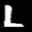

In [10]:
array_to_img(train_images[0])

In [13]:
train_labels

array([25.,  6.,  9., ...,  1.,  8., 32.], dtype=float32)

In [14]:
LB = LabelBinarizer()
train_labels = LB.fit_transform(train_labels)
val_labels = LB.fit_transform(val_labels)

In [15]:
train_labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [16]:
train_labels = np.array(train_labels)
val_labels = np.array(val_labels)

In [17]:
train_labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [18]:
#plot more images her letters to visualize

In [19]:
# restnet = ResNet50(include_top=False, weights='imagenet')

In [20]:
# output = restnet.layers[-1].output
# output= keras.layers.Flatten()(output)

In [21]:
# restnet = Model(restnet.input, output=output)

In [22]:
model_1 = Sequential()

model_1.add(Conv2D(32, (3, 3), padding = 'same', activation='relu', input_shape=(32, 32, 1)))
model_1.add(MaxPooling2D(pool_size=(2,2)))
model_1.add(Conv2D(64, (3, 3), activation='relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Conv2D(128, (3, 3), activation='relu'))
model_1.add(MaxPooling2D(pool_size=(2,2)))
model_1.add(Dropout(.025))

model_1.add(Flatten())
model_1.add(Dense(128, activation='relu'))
model_1.add(Dropout(0.2))
model_1.add(Dense(39, activation='softmax'))

In [23]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 5, 128)         73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2, 2, 128)        

In [24]:
model_1.compile(loss = 'categorical_crossentropy',
             optimizer='adam',
             metrics = ['accuracy'])

In [59]:
np.random.seed(123)
results_1 = model_1.fit(train_images, train_labels, epochs=50, validation_data=(val_images, val_labels), batch_size=32, verbose=1)

Train on 834036 samples, validate on 22524 samples
Epoch 1/50
834036/834036 [==============================] - 111s 133us/step - loss: 0.1537 - accuracy: 0.9482 - val_loss: 0.1663 - val_accuracy: 0.9519
Epoch 2/50
834036/834036 [==============================] - 111s 133us/step - loss: 0.1533 - accuracy: 0.9480 - val_loss: 0.1816 - val_accuracy: 0.9475
Epoch 3/50
834036/834036 [==============================] - 110s 132us/step - loss: 0.1524 - accuracy: 0.9483 - val_loss: 0.1761 - val_accuracy: 0.9478
Epoch 4/50
834036/834036 [==============================] - 112s 134us/step - loss: 0.1512 - accuracy: 0.9489 - val_loss: 0.1788 - val_accuracy: 0.9511
Epoch 5/50
834036/834036 [==============================] - 111s 134us/step - loss: 0.1494 - accuracy: 0.9495 - val_loss: 0.1707 - val_accuracy: 0.9475
Epoch 6/50
834036/834036 [==============================] - 111s 132us/step - loss: 0.1499 - accuracy: 0.9494 - val_loss: 0.1854 - val_accuracy: 0.9498
Epoch 7/50
834036/834036 [===========

In [60]:
results_1.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

In [61]:
def visualize_training_results(results):
    history = results.history
    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure()
    plt.plot(history['val_accuracy'])
    plt.plot(history['accuracy'])
    plt.legend(['val_accuracy', 'accuracy'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

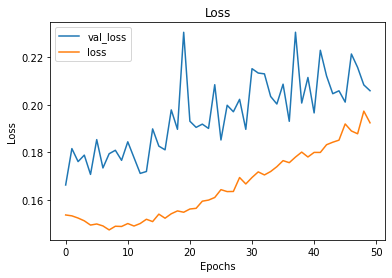

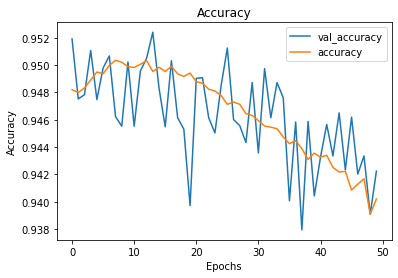

In [62]:
visualize_training_results(results_1)

In [29]:
# plot confusion matrix

In [63]:
def sort_contours(cnts, method='left-to-right'):
    reverse = False
    i = 0
    if method == 'right-to-left' or method == 'bottom-to-top':
        reverse = True
    if method == 'top-to-bottom' or method == 'botton-to-top':
        i = 1
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
       key = lambda b:b[1][i], reverse=reverse))
    return (cnts, boundingBoxes)

In [70]:
def get_letters(img):
    letters = []
    image = cv2.imread(img)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ret,thresh1 = cv2.threshold(gray ,127,255,cv2.THRESH_BINARY_INV)
    dilated = cv2.dilate(thresh1, None, iterations=2)

    cnts = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    cnts = sort_contours(cnts, method="left-to-right")[0]
    # loop over the contours
    for c in cnts:
        if cv2.contourArea(c) > 10:
            (x, y, w, h) = cv2.boundingRect(c)
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        roi = gray[y:y + h, x:x + w]
        thresh = cv2.threshold(roi, 0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
        thresh = cv2.resize(thresh, (32, 32), interpolation = cv2.INTER_CUBIC)
        thresh = thresh.astype("float32") / 255.0
        thresh = np.expand_dims(thresh, axis=-1)
        thresh = thresh.reshape(1,32,32,1)
        ypred = model_1.predict(thresh)
        ypred = LB.inverse_transform(ypred)
        ypred = [k for k, v in train_generator.class_indices.items() if v == ypred]
        [x] = ypred
        letters.append(x)
    return letters, image

In [36]:
# gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [37]:
# ret,thresh1 = cv2.threshold(gray ,127,255,cv2.THRESH_BINARY_INV)

In [38]:
# dilated = cv2.dilate(thresh1, None, iterations=2)

In [39]:
# cnts = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

In [40]:
# cnts = imutils.grab_contours(cnts)

In [41]:
# cnts = sort_contours(cnts, method="left-to-right")[0]

In [42]:
# for c in cnts:
#         if cv2.contourArea(c) > 10:
#             (x, y, w, h) = cv2.boundingRect(c)
#             cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

In [43]:
# roi = gray[y:y + h, x:x + w]

In [44]:
# thresh = cv2.threshold(roi, 0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

In [45]:
# thresh = cv2.resize(thresh, (32, 32), interpolation = cv2.INTER_CUBIC)

In [46]:
# thresh = thresh.astype("float32") / 255.0

In [47]:
# thresh = np.expand_dims(thresh, axis=-1)

In [48]:
# thresh = thresh.reshape(1,32,32,1)

In [49]:
# ypred = model_1.predict(thresh)

In [50]:
# ypred = LB.inverse_transform(ypred)

In [51]:
# ypred

array([31.], dtype=float32)

In [71]:
def get_word(letter):
    word = "".join(letter)
    return word

EL7SA


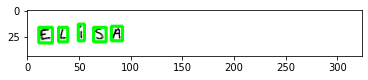

In [72]:
letter, image = get_letters("dataset/handwritting_names/train_v2/train/TRAIN_00037.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)